In [1]:
import numpy as np
from math import *
#
Re= 6870*pow(10,6)
#condiciones iniciales Hawaii
Hawaii=[1,19.47,-155.6]
Polo_H=[1,-61.7,97.2]
omega_H=9.75*(pow(10,-7))
#condiciones iniciales Detroit Seamount
De_seaM=[1,51.48,167.6]
Polo_seaM=[1,48.7,-78.2]
omega_seaM=7.8*(pow(10,-7))


In [2]:
#metodos necesarios

#grados a radianes
def degToRad(X):
    X[1]=radians(X[1])
    X[2]=radians(X[2])
    
#coordenadas esfericas a cartesianas

def sphericalToCartesian(A):
    B=[0,0,0]
    B[0]=A[0]*cos(A[1])*cos(A[2])
    B[1]=A[0]*cos(A[1])*sin(A[2])
    B[2]=A[0]*sin(A[1])
    return B

#genera la matriz de transformacion

def matrixT(K):
    T=[[0 for x in range(3)] for x in range(3)]
    T[0][0]=-sin(K[1])*cos(K[2])
    T[0][1]=-sin(K[1])*sin(K[2])
    T[0][2]=cos(K[1])
    T[1][0]=-sin(K[2])
    T[1][1]=cos(K[2])
    T[1][2]=0
    T[2][0]=-cos(K[1])*cos(K[2])
    T[2][1]=-cos(K[1])*sin(K[2])
    T[2][2]=-sin(K[1])
    return T

#Metodo que recibe las coordenadas y el omega con lo cual devuelve los valores de velocidad en marco de referencia local 
# en centimetros/year. Primer numero es Vnorth, segundo V east, tercero Vup y el último el valor absoluto.
def Euler(A,B,C): #A es el punto de interes, b el polo de euler y C el valor de w
    degToRad(A)
    degToRad(B)
    C=C*(pi/180)
    Polo_car=sphericalToCartesian(B)
    POI_car=sphericalToCartesian(A)
    Polo_car=C*np.array(Polo_car)
    VC=np.cross(Polo_car,POI_car)
    VC=Re*np.array(VC)
    T=matrixT(A)
    Vt=np.dot(T,VC)
    magnitud=sqrt(pow(Vt[0],2)+pow(Vt[1],2)+pow(Vt[2],2))
    resultado=(Vt[0]/10,Vt[1]/10,Vt[2]/10,magnitud/10)
    return resultado
def Texto(a):
    return ("Vnorth= {:.3f}".format(a[0])+" cm/year \nVeast= {:.3f}".format(a[1])+" cm/year \nVup= {:.3f}".format(a[2])+" cm/year \nVabsolute= {:.3f}".format(a[3])+" cm/year" )

#define el tiempo necesario para recorrer una distancia d con una velocidad d. Retorna un texto.
def Time(v,d):
    time=(d*100000)/v
    return ("Le tomará recorrer " +str(d)+"km en {:.2f}".format(time/1000000)+" MA")
    
    
    
    

# Punto 2A

In [3]:
#Punto 2A Tarea
F=Euler(Hawaii,Polo_H,omega_H)
Message=Texto(F)
to=Time(F[3],100)
print (Message)
print (to)

Vnorth= 5.295 cm/year 
Veast= -9.158 cm/year 
Vup= 0.000 cm/year 
Vabsolute= 10.579 cm/year
Le tomará recorrer 100km en 0.95 MA


# Punto 2b

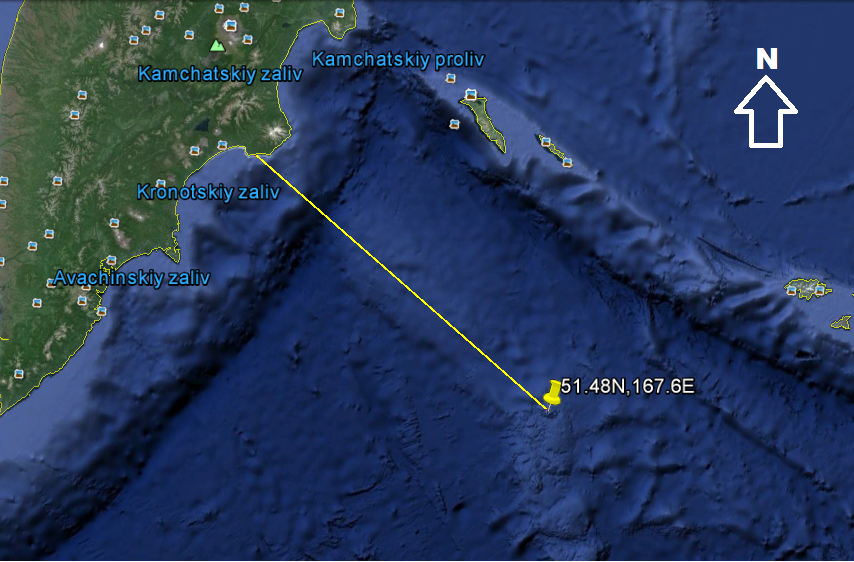

In [4]:
from IPython.display import Image
Image(filename='Seamount.png')

En el punto 2b es importante aclarar que los signos serán opuestos a los que muestra el método pues estamos midiendo el movimiento relativo entre eurasia y el pacífico.

In [5]:
#Punto 2b Tarea
G=Euler(De_seaM,Polo_seaM,omega_seaM)
Mensaje=Texto(G)
tiempo=Time(G[3],530)
print (Mensaje)
print (tiempo)

Vnorth= -5.630 cm/year 
Veast= 6.356 cm/year 
Vup= -0.000 cm/year 
Vabsolute= 8.491 cm/year
Le tomará recorrer 530km en 6.24 MA


# Punto 3

Se seleccionaron 6 puntos a lo largo del límite de placas como se ve en la imagen:

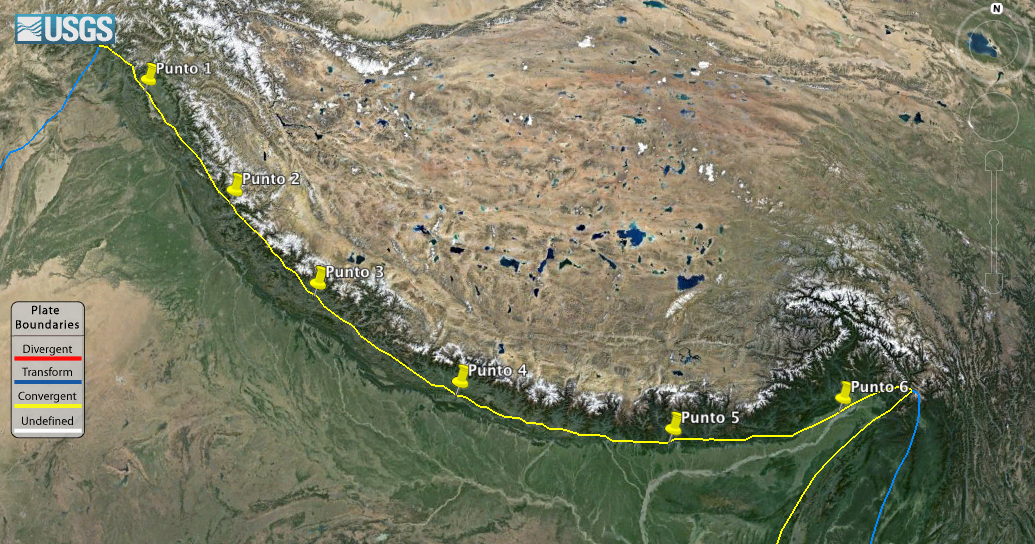

In [6]:
Image(filename='Hima.png')

In [7]:
#Condiciones iniciales
P_I1=[1,24.4,17.7]#polo india
P_I2=[1,24.4,17.7]#polo india
P_I3=[1,24.4,17.7]#polo india
P_I4=[1,24.4,17.7]#polo india
P_I5=[1,24.4,17.7]#polo india
P_I6=[1,24.4,17.7]#polo india
#Por alguna razon el método modifica el polo, lo ideal sería usar un solo Polo. Despues lo reviso.
W_India= 5.3

Punto1=[1,28.25,83.12]
Punto2=[1,27.05,87.34]
Punto3=[1,29.67,80.30]
Punto4=[1,27.70,84.45]
Punto5=[1,26.90,90.23]
Punto6=[1,27.68,94.96]


P1=Euler(Punto1,P_I1,W_India)
P2=Euler(Punto2,P_I2,W_India)
P3=Euler(Punto3,P_I3,W_India)
P4=Euler(Punto4,P_I4,W_India)
P5=Euler(Punto5,P_I5,W_India)
P6=Euler(Punto6,P_I6,W_India)

print (P1[3]/10000000)
print (P2[3]/10000000)
print (P3[3]/10000000)
print (P4[3]/10000000)
print (P5[3]/10000000)
print (P6[3]/10000000)

print ((P1[3]+P2[3]+P3[3]+P4[3]+P5[3]+P6[3])/60000000)



5.392044273501561
5.60910354569966
5.227481934045056
5.4651483993444705
5.7352404622134605
5.90456034615223
5.5555964934927395


En promedio el movimiento de india con respecto a Eurasia es de 5.56 cm/year